In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd
import seaborn as sns
import pandas as pd
import numpy as np

In [34]:

df = pd.read_csv('./cps_merged_cust.csv')
df1 = pd.read_csv('./dcps.csv')
data = pd.read_csv("./dcps.csv")

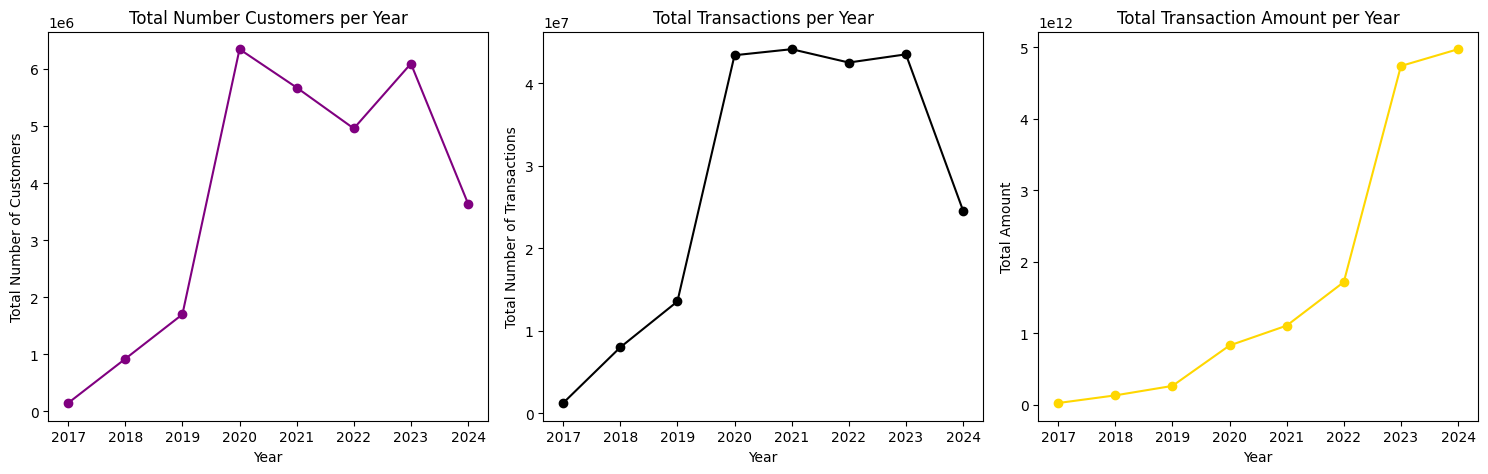

In [35]:
# Assuming df is your DataFrame with columns: 'transaction_date', 'amount'
data['BUSINESSDATE'] = pd.to_datetime(data['BUSINESSDATE'])
data['year'] = data['BUSINESSDATE'].dt.year

yearly_data = data.groupby('year').agg({
    'NO_TXN': 'sum',
    'AMOUNT': 'sum',
    'NO_CUSTOMER': 'sum',
}).rename(columns={'transaction_date': 'total_transactions','transaction_date': 'no_customers'})

# Plotting

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(yearly_data.index, yearly_data['NO_CUSTOMER'], marker='o', color ='purple')
plt.title('Total Number Customers per Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Customers')
# plt.ylim(0, yearly_data['NO_TXN'].min() + 1000)  # Customize y-axis range

plt.subplot(1, 3, 2)
plt.plot(yearly_data.index, yearly_data['NO_TXN'], marker='o', color ='black')
plt.title('Total Transactions per Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Transactions')

plt.subplot(1, 3, 3)
plt.plot(yearly_data.index, yearly_data['AMOUNT'], marker='o', color ='gold')
plt.title('Total Transaction Amount per Year')
plt.xlabel('Year')
plt.ylabel('Total Amount')

plt.tight_layout()
plt.show()

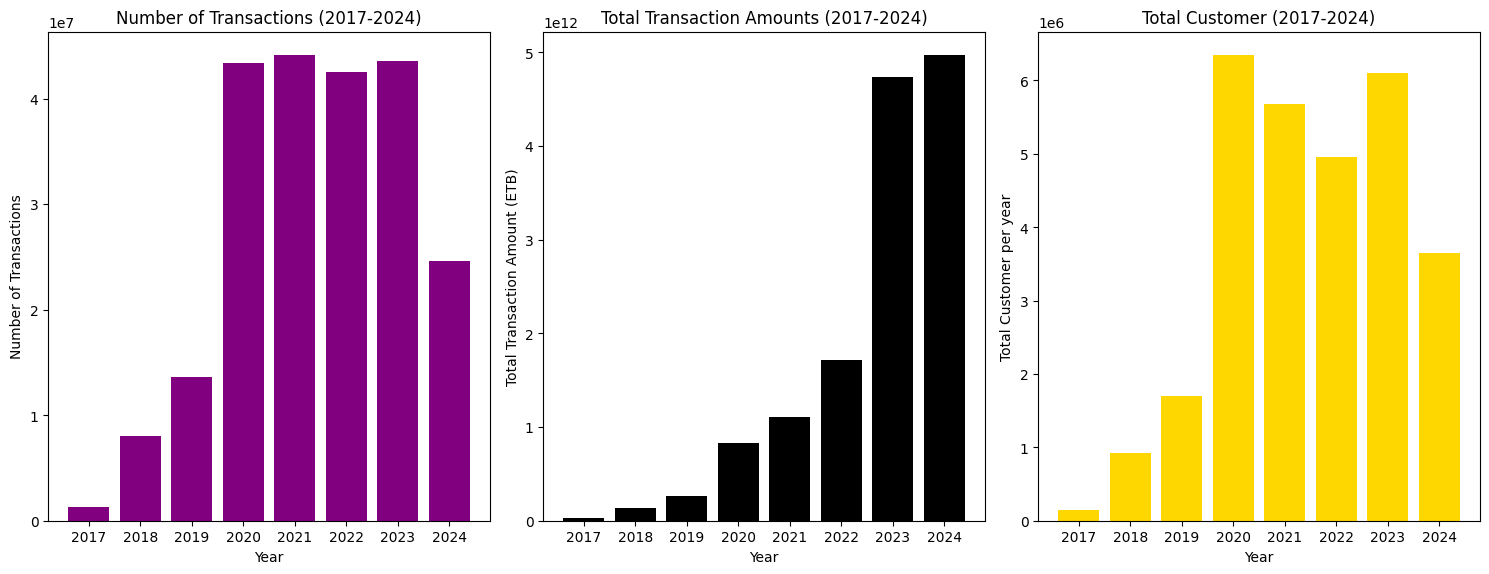

In [36]:
plt.figure(figsize=(15, 6))
# Plotting the number of transactions per year
plt.subplot(1, 3, 1)
plt.bar(yearly_data.index, yearly_data.NO_TXN, color='purple')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions (2017-2024)')

# Plotting the total transaction amounts
plt.subplot(1, 3, 2)
plt.bar(yearly_data.index, yearly_data.AMOUNT, color='black')
plt.xlabel('Year')
plt.ylabel('Total Transaction Amount (ETB)')
plt.title('Total Transaction Amounts (2017-2024)')

# Plotting the total customer per year
plt.subplot(1, 3, 3)
plt.bar(yearly_data.index, yearly_data.NO_CUSTOMER, color='gold')
plt.xlabel('Year')
plt.ylabel('Total Customer per year')
plt.title('Total Customer (2017-2024)')

plt.tight_layout()
plt.show()

In [17]:
df1['BUSINESSDATE'] = pd.to_datetime(df1['BUSINESSDATE'])
df['OPEN_DATE'] = pd.to_datetime(df['OPEN_DATE'])

C:\Users\CBE\AppData\Local\Temp\ipykernel_15068\246082577.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_customers = df1['NO_CUSTOMER'].resample('M').sum()
C:\Users\CBE\AppData\Local\Temp\ipykernel_15068\246082577.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_customers_held_trx = df['NO_CUSTOMER'].resample('M').sum()


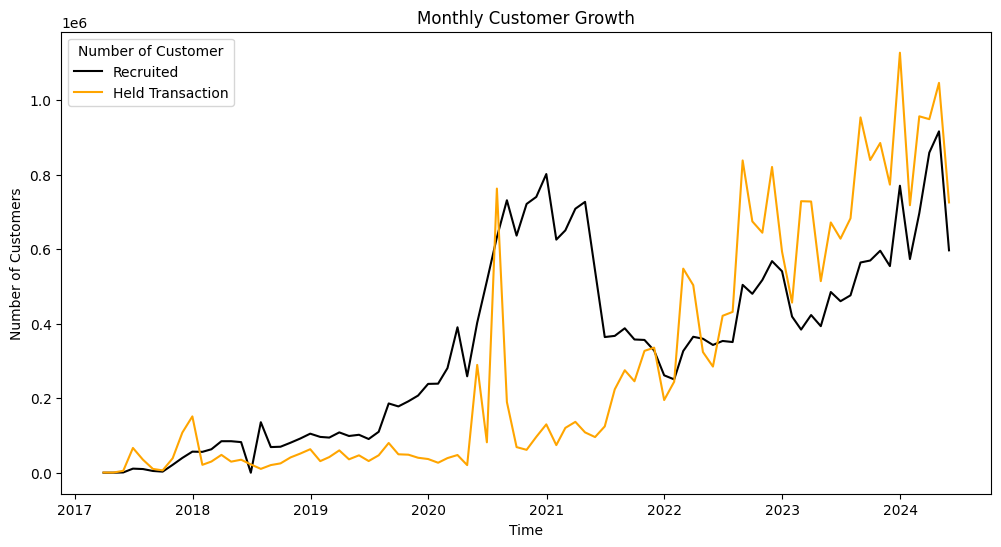

In [9]:
# Set the date as the index for easier plotting
df.set_index('OPEN_DATE', inplace=True)
df1.set_index('BUSINESSDATE', inplace = True)

# Resample to monthly frequency and sum NO_CUSTOMER
monthly_customers = df1['NO_CUSTOMER'].resample('M').sum()
monthly_customers_held_trx = df['NO_CUSTOMER'].resample('M').sum()
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_customers, label = 'Recruited', color = 'Black')
sns.lineplot(data=monthly_customers_held_trx, label = 'Held Transaction', color = 'orange')
plt.title('Monthly Customer Growth')
plt.xlabel('Time')
plt.ylabel('Number of Customers')
plt.legend(title = 'Number of Customer')
plt.show()

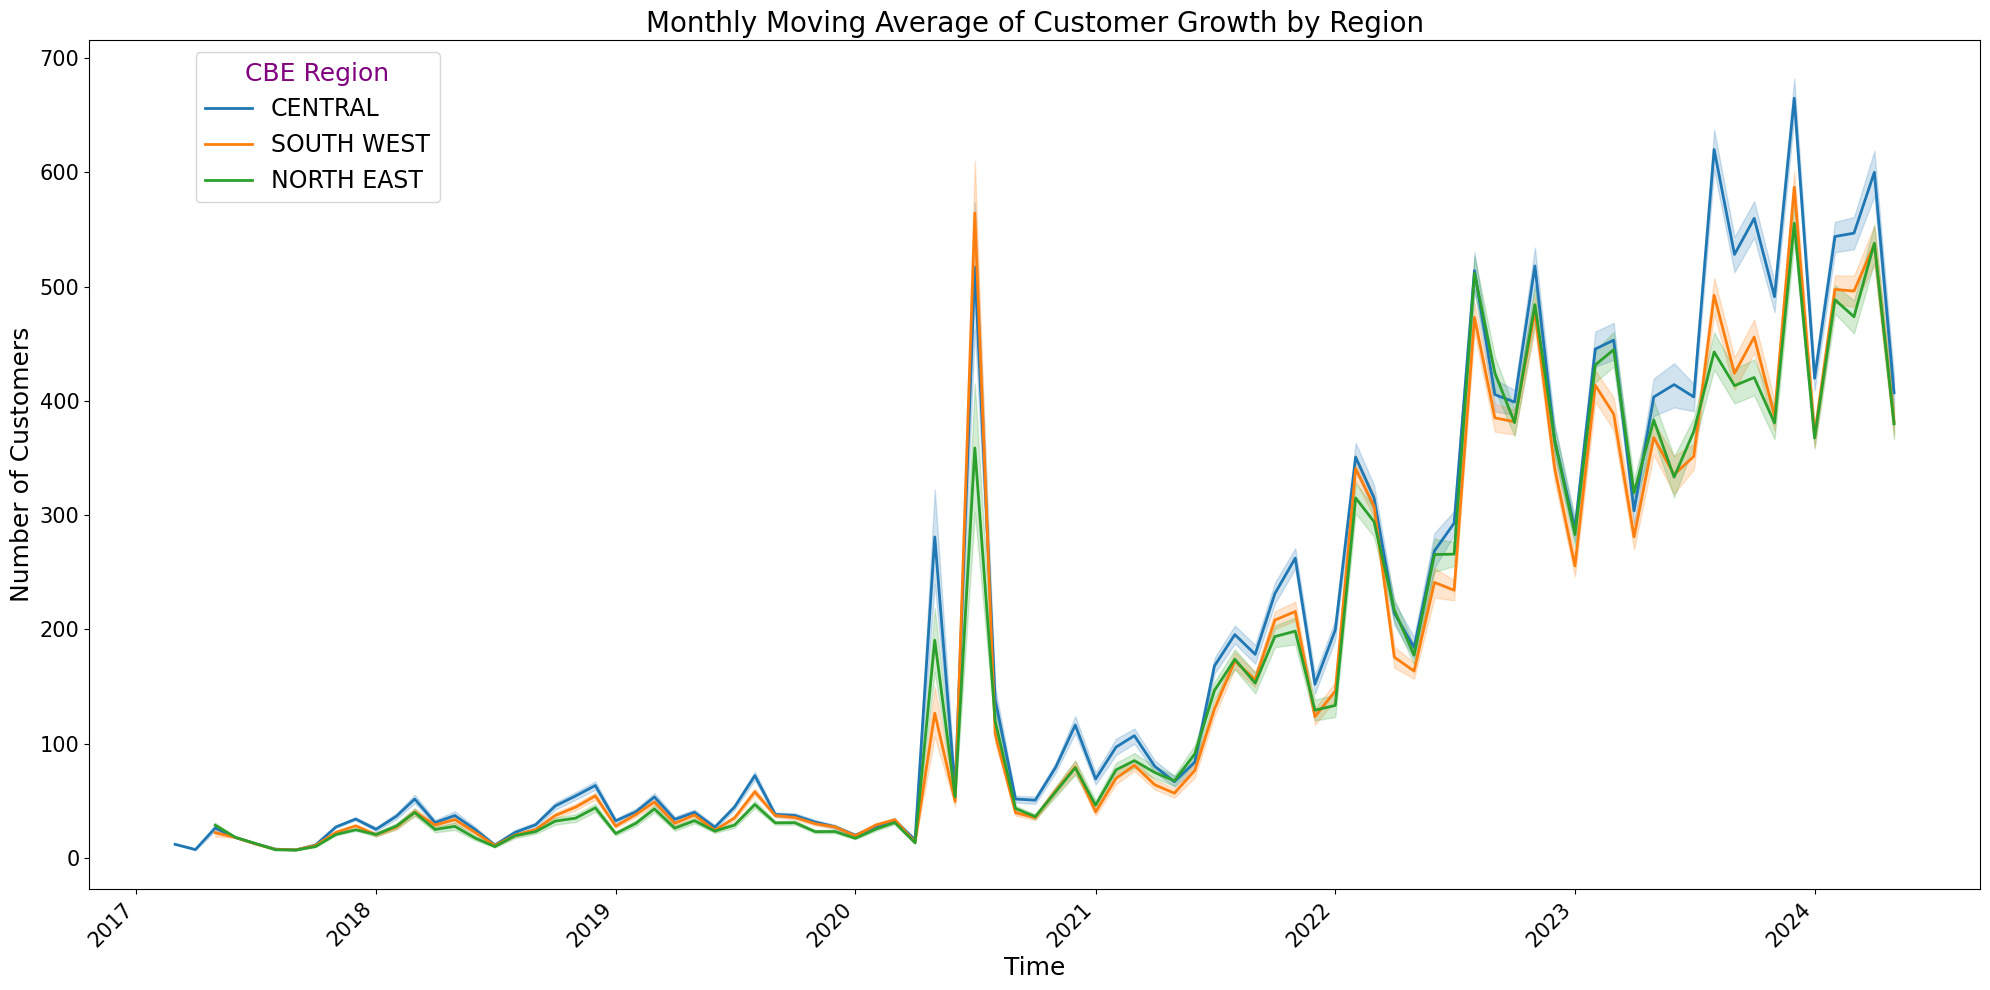

In [13]:
df['monthly_avg'] = df['NO_CUSTOMER'].rolling(window=30).mean()
# Plotting
plt.figure(figsize=(20, 10))
sns.lineplot(data=df, x='OPEN_DATE', y='monthly_avg', hue='CBE_REGION', linewidth=2, color = ['Purple', 'Gold', 'Black'])
plt.title('Monthly Moving Average of Customer Growth by Region', fontsize=20)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Number of Customers', fontsize=18)
legend = plt.legend(title='CBE Region', bbox_to_anchor=(0.05, 1), loc='upper left', fontsize=17, title_fontsize=18)  # Move legend outside and adjust position
legend.get_title().set_color("Purple")
plt.tick_params(axis='y', labelsize=15)
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.tight_layout()
plt.show()

C:\Users\CBE\AppData\Local\Temp\ipykernel_15068\2834265297.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  region_monthly_customers_1 = agg_central.groupby('DISTRICTNAME')['NO_CUSTOMER'].resample('M').sum().unstack(0)
C:\Users\CBE\AppData\Local\Temp\ipykernel_15068\2834265297.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  region_monthly_trx_1 = agg_central.groupby('DISTRICTNAME')['NO_TXN'].resample('M').sum().unstack(0)
C:\Users\CBE\AppData\Local\Temp\ipykernel_15068\2834265297.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  region_monthly_amt_1 = agg_central.groupby('DISTRICTNAME')['AMOUNT'].resample('M').sum().unstack(0)


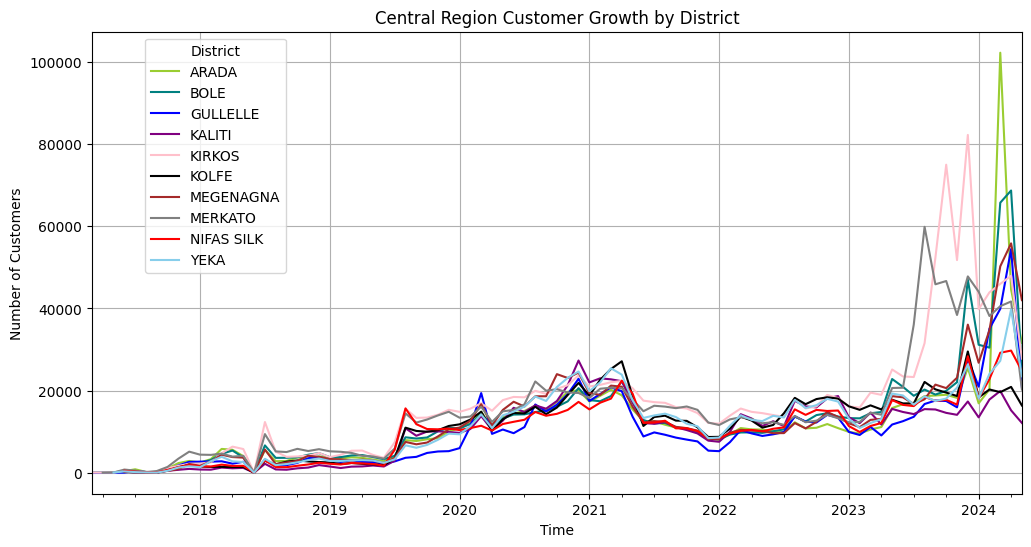

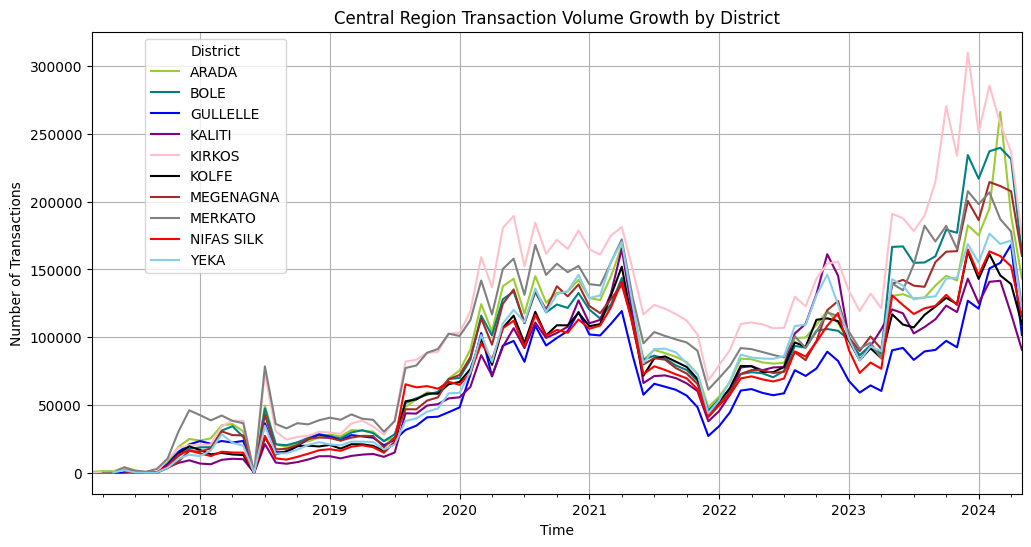

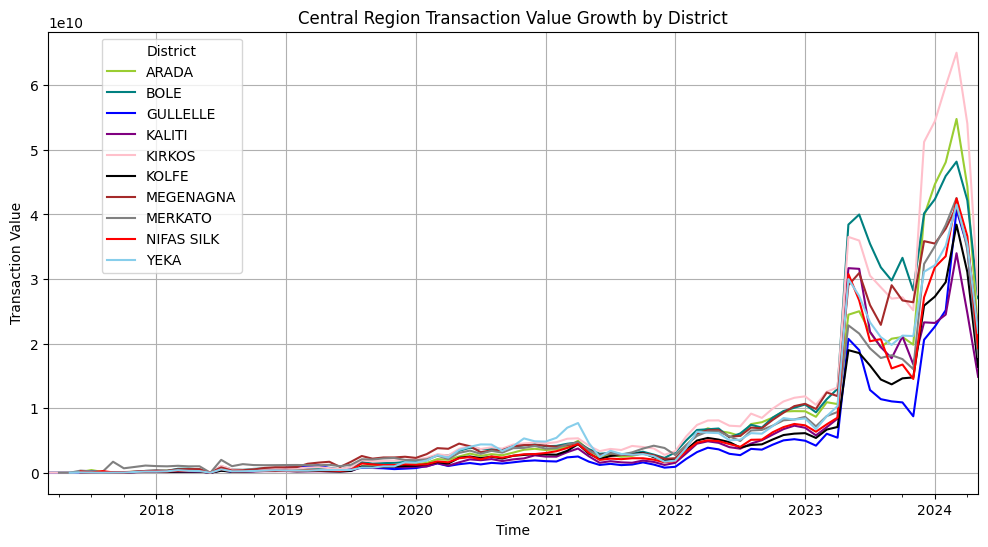

In [18]:
df.set_index('OPEN_DATE', inplace=True)
df1.set_index('BUSINESSDATE', inplace = True)


agg_central = df1[(df1.DISTRICTNAME == 'KIRKOS') | (df1.DISTRICTNAME == 'KOLFE')|(df1.DISTRICTNAME == 'NIFAS SILK')
                | (df1.DISTRICTNAME == 'MERKATO') | (df1.DISTRICTNAME == 'KALITI') | (df1.DISTRICTNAME == 'YEKA') 
                | (df1.DISTRICTNAME == 'ARADA') | (df1.DISTRICTNAME == 'BOLE')
               |(df1.DISTRICTNAME == 'MEGENAGNA') | (df1.DISTRICTNAME == 'GULLELLE')]
region_monthly_customers_1 = agg_central.groupby('DISTRICTNAME')['NO_CUSTOMER'].resample('M').sum().unstack(0)
region_monthly_trx_1 = agg_central.groupby('DISTRICTNAME')['NO_TXN'].resample('M').sum().unstack(0)
region_monthly_amt_1 = agg_central.groupby('DISTRICTNAME')['AMOUNT'].resample('M').sum().unstack(0)
sizes = (12, 6)
pl1, pl2 = 1,1
locs = 'upper left'
xl = 'Time'
reg = 'Central Region'
anc = (0.05, 1)
colors = ['yellowgreen',"teal", 'Blue',"purple", "pink", "black", "Brown", "Gray", "red", 'skyblue', 'Orange']
fig, (ax1) = plt.subplots(pl1, pl1, figsize=sizes)
region_monthly_customers_1.plot(ax=ax1, color = colors)
# region_monthly_customers_1.plot()
ax1.set_title(f'{reg} Customer Growth by District')
ax1.set_xlabel(xl)
ax1.set_ylabel('Number of Customers')
ax1.legend(title='District', bbox_to_anchor=anc, loc= locs)  # Legend outside the plot
ax1.grid(True)
plt.show()

fig, (ax2) = plt.subplots(pl1, pl1, figsize=sizes)
# Second plot: Monthly Transaction Growth by District
region_monthly_trx_1.plot(ax=ax2, color = colors)
ax2.set_title(f'{reg} Transaction Volume Growth by District')
ax2.set_xlabel(xl)
ax2.set_ylabel('Number of Transactions')
ax2.legend(title='District', bbox_to_anchor=anc, loc=locs)  # Legend outside the plot
ax2.grid(True)
plt.show()

fig, (ax3) = plt.subplots(pl1, pl1, figsize=sizes)
region_monthly_amt_1.plot(ax=ax3, color = colors)
ax3.set_title(f'{reg} Transaction Value Growth by District')
ax3.set_xlabel(xl)
ax3.set_ylabel('Transaction Value')
ax3.legend(title='District', bbox_to_anchor=anc, loc=locs)  # Legend outside the plot
ax3.grid(True)
plt.show()

C:\Users\CBE\AppData\Local\Temp\ipykernel_15068\3334583210.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  region_monthly_customers_1 = agg_south.groupby('DISTRICTNAME')['NO_CUSTOMER'].resample('M').sum().unstack(0)
C:\Users\CBE\AppData\Local\Temp\ipykernel_15068\3334583210.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  region_monthly_trx_1 = agg_south.groupby('DISTRICTNAME')['NO_TXN'].resample('M').sum().unstack(0)
C:\Users\CBE\AppData\Local\Temp\ipykernel_15068\3334583210.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  region_monthly_amt_1 = agg_south.groupby('DISTRICTNAME')['AMOUNT'].resample('M').sum().unstack(0)


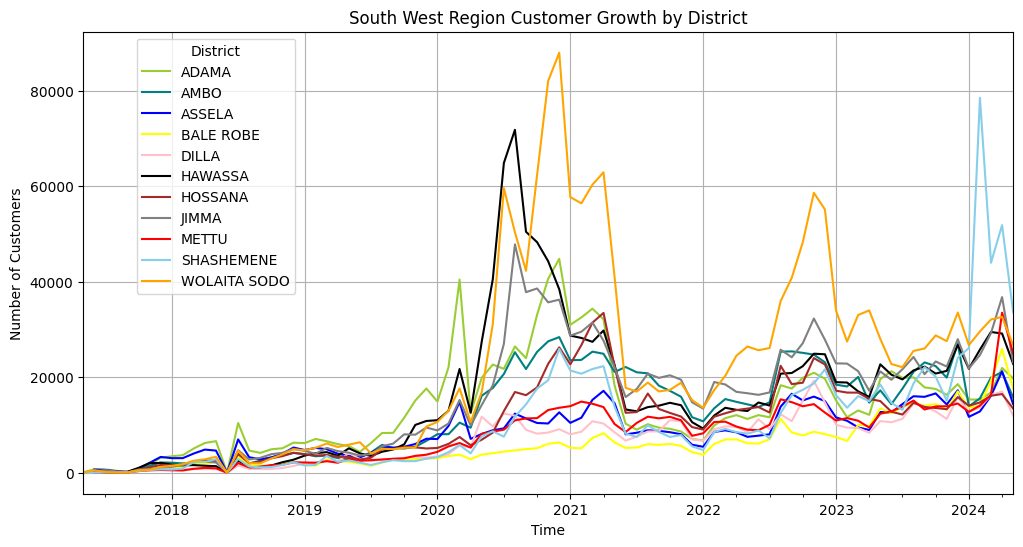

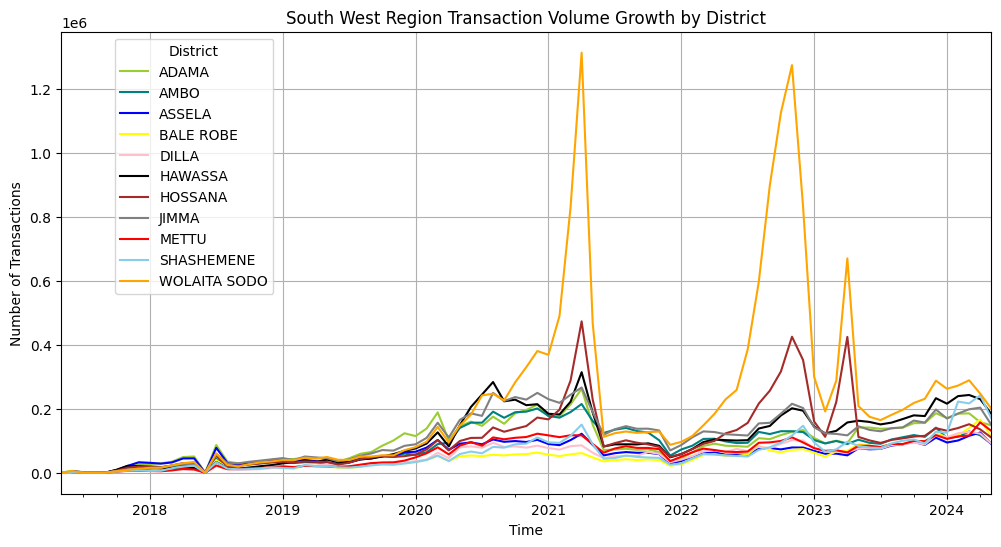

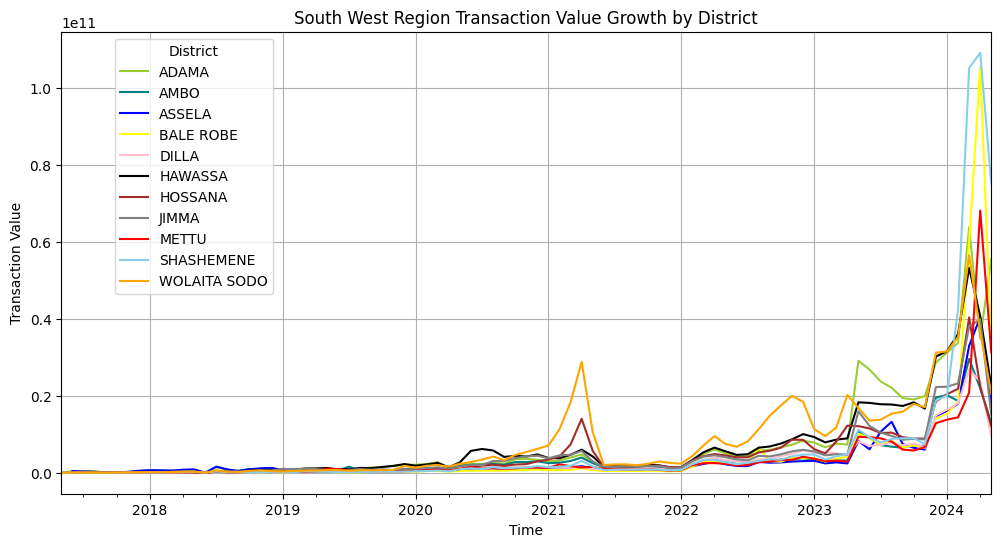

In [19]:
agg_south = df1[(df1.DISTRICTNAME == 'SHASHEMENE') | (df1.DISTRICTNAME == 'DILLA')|(df1.DISTRICTNAME == 'ADAMA')
                | (df1.DISTRICTNAME == 'WOLAITA SODO') | (df1.DISTRICTNAME == 'AMBO') | (df1.DISTRICTNAME == 'HAWASSA') 
                | (df1.DISTRICTNAME == 'METTU') | (df1.DISTRICTNAME == 'ASSELA')
               |(df1.DISTRICTNAME == 'BALE ROBE') | (df1.DISTRICTNAME == 'HOSSANA') | (df1.DISTRICTNAME == 'JIMMA')]
region_monthly_customers_1 = agg_south.groupby('DISTRICTNAME')['NO_CUSTOMER'].resample('M').sum().unstack(0)
region_monthly_trx_1 = agg_south.groupby('DISTRICTNAME')['NO_TXN'].resample('M').sum().unstack(0)
region_monthly_amt_1 = agg_south.groupby('DISTRICTNAME')['AMOUNT'].resample('M').sum().unstack(0)
sizes = (12, 6)
pl1, pl2 = 1,1
locs = 'upper left'
xl = 'Time'
anc = (0.05, 1)
reg = 'South West Region'
colors = ['yellowgreen',"teal", 'Blue',"Yellow", "pink", "black", "Brown", "Gray", "red", 'skyblue', 'Orange']
fig, (ax1) = plt.subplots(pl1, pl1, figsize=sizes)
region_monthly_customers_1.plot(ax=ax1, color = colors)
# region_monthly_customers_1.plot()
ax1.set_title(f'{reg} Customer Growth by District')
ax1.set_xlabel(xl)
ax1.set_ylabel('Number of Customers')
ax1.legend(title='District', bbox_to_anchor=anc, loc= locs)  # Legend outside the plot
ax1.grid(True)
plt.show()

fig, (ax2) = plt.subplots(pl1, pl1, figsize=sizes)
# Second plot: Monthly Transaction Growth by District
region_monthly_trx_1.plot(ax=ax2, color = colors)
ax2.set_title(f'{reg} Transaction Volume Growth by District')
ax2.set_xlabel(xl)
ax2.set_ylabel('Number of Transactions')
ax2.legend(title='District', bbox_to_anchor=anc, loc=locs)  # Legend outside the plot
ax2.grid(True)
plt.show()

fig, (ax3) = plt.subplots(pl1, pl1, figsize=sizes)
region_monthly_amt_1.plot(ax=ax3, color = colors)
ax3.set_title(f'{reg} Transaction Value Growth by District')
ax3.set_xlabel(xl)
ax3.set_ylabel('Transaction Value')
ax3.legend(title='District', bbox_to_anchor=anc, loc=locs)  # Legend outside the plot
ax3.grid(True)
plt.show()

C:\Users\CBE\AppData\Local\Temp\ipykernel_15068\614129107.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  region_monthly_customers_1 = agg_north.groupby('DISTRICTNAME')['NO_CUSTOMER'].resample('M').sum().unstack(0)
C:\Users\CBE\AppData\Local\Temp\ipykernel_15068\614129107.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  region_monthly_trx_1 = agg_north.groupby('DISTRICTNAME')['NO_TXN'].resample('M').sum().unstack(0)
C:\Users\CBE\AppData\Local\Temp\ipykernel_15068\614129107.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  region_monthly_amt_1 = agg_north.groupby('DISTRICTNAME')['AMOUNT'].resample('M').sum().unstack(0)


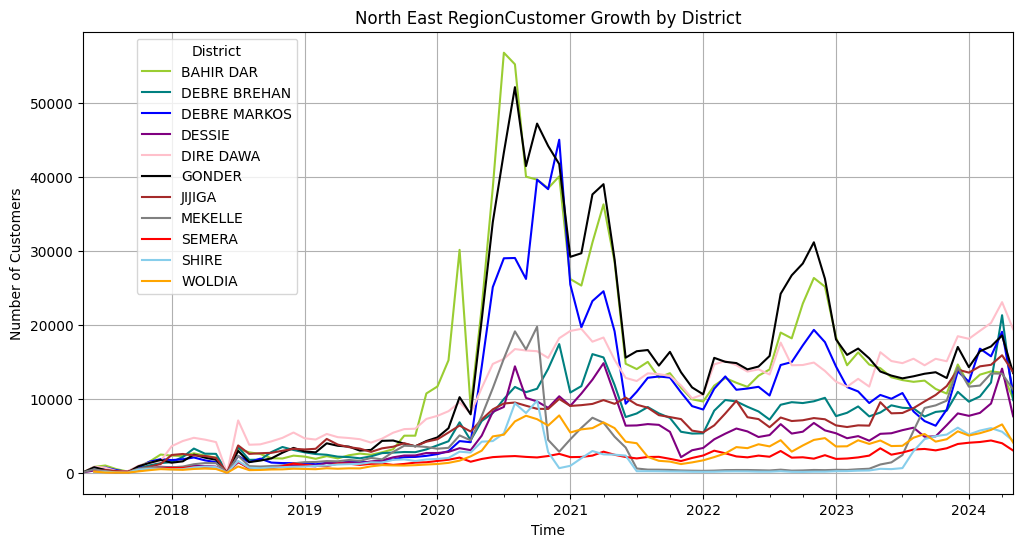

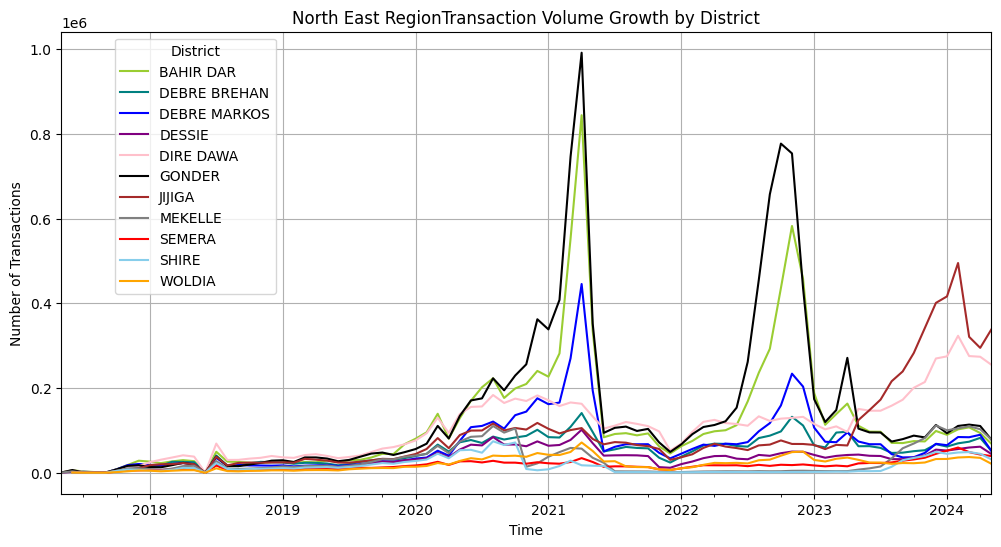

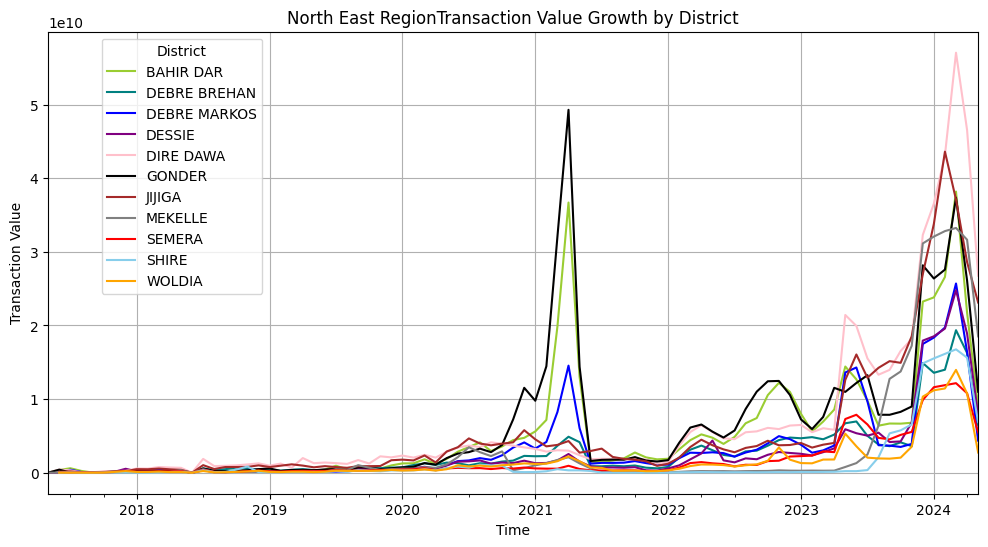

In [20]:
agg_north = df1[(df1.DISTRICTNAME == 'SHIRE') | (df1.DISTRICTNAME == 'GONDER')|(df1.DISTRICTNAME == 'DEBRE BREHAN')
                | (df1.DISTRICTNAME == 'BAHIR DAR') | (df1.DISTRICTNAME == 'DESSIE') | (df1.DISTRICTNAME == 'SEMERA') 
                | (df1.DISTRICTNAME == 'MEKELLE') | (df1.DISTRICTNAME == 'WOLDIA')
               |(df1.DISTRICTNAME == 'DIRE DAWA') | (df1.DISTRICTNAME == 'DEBRE MARKOS') | (df1.DISTRICTNAME == 'JIJIGA')]
region_monthly_customers_1 = agg_north.groupby('DISTRICTNAME')['NO_CUSTOMER'].resample('M').sum().unstack(0)
region_monthly_trx_1 = agg_north.groupby('DISTRICTNAME')['NO_TXN'].resample('M').sum().unstack(0)
region_monthly_amt_1 = agg_north.groupby('DISTRICTNAME')['AMOUNT'].resample('M').sum().unstack(0)

colors = ['yellowgreen',"teal", 'Blue',"purple", "pink", "black", "Brown", "Gray", "red", 'skyblue', 'Orange']
reg = 'North East Region'
sizes = (12, 6)
pl1, pl2 = 1,1
locs = 'upper left'
xl = 'Time'
anc = (0.05, 1)
fig, (ax1) = plt.subplots(pl1, pl1, figsize=sizes)
region_monthly_customers_1.plot(ax=ax1, color = colors)
# region_monthly_customers_1.plot()
ax1.set_title(f'{reg}Customer Growth by District')
ax1.set_xlabel(xl)
ax1.set_ylabel('Number of Customers')
ax1.legend(title='District', bbox_to_anchor=anc, loc= locs)  # Legend outside the plot
ax1.grid(True)
plt.show()

fig, (ax2) = plt.subplots(pl1, pl1, figsize=sizes)
# Second plot: Monthly Transaction Growth by District
region_monthly_trx_1.plot(ax=ax2, color = colors)
ax2.set_title(f'{reg}Transaction Volume Growth by District')
ax2.set_xlabel(xl)
ax2.set_ylabel('Number of Transactions')
ax2.legend(title='District', bbox_to_anchor=anc, loc=locs)  # Legend outside the plot
ax2.grid(True)
plt.show()

fig, (ax3) = plt.subplots(pl1, pl1, figsize=sizes)
region_monthly_amt_1.plot(ax=ax3, color = colors)
ax3.set_title(f'{reg}Transaction Value Growth by District')
ax3.set_xlabel(xl)
ax3.set_ylabel('Transaction Value')
ax3.legend(title='District', bbox_to_anchor=anc, loc=locs)  # Legend outside the plot
ax3.grid(True)
plt.show()

C:\Users\CBE\AppData\Local\Temp\ipykernel_15068\2237252857.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot


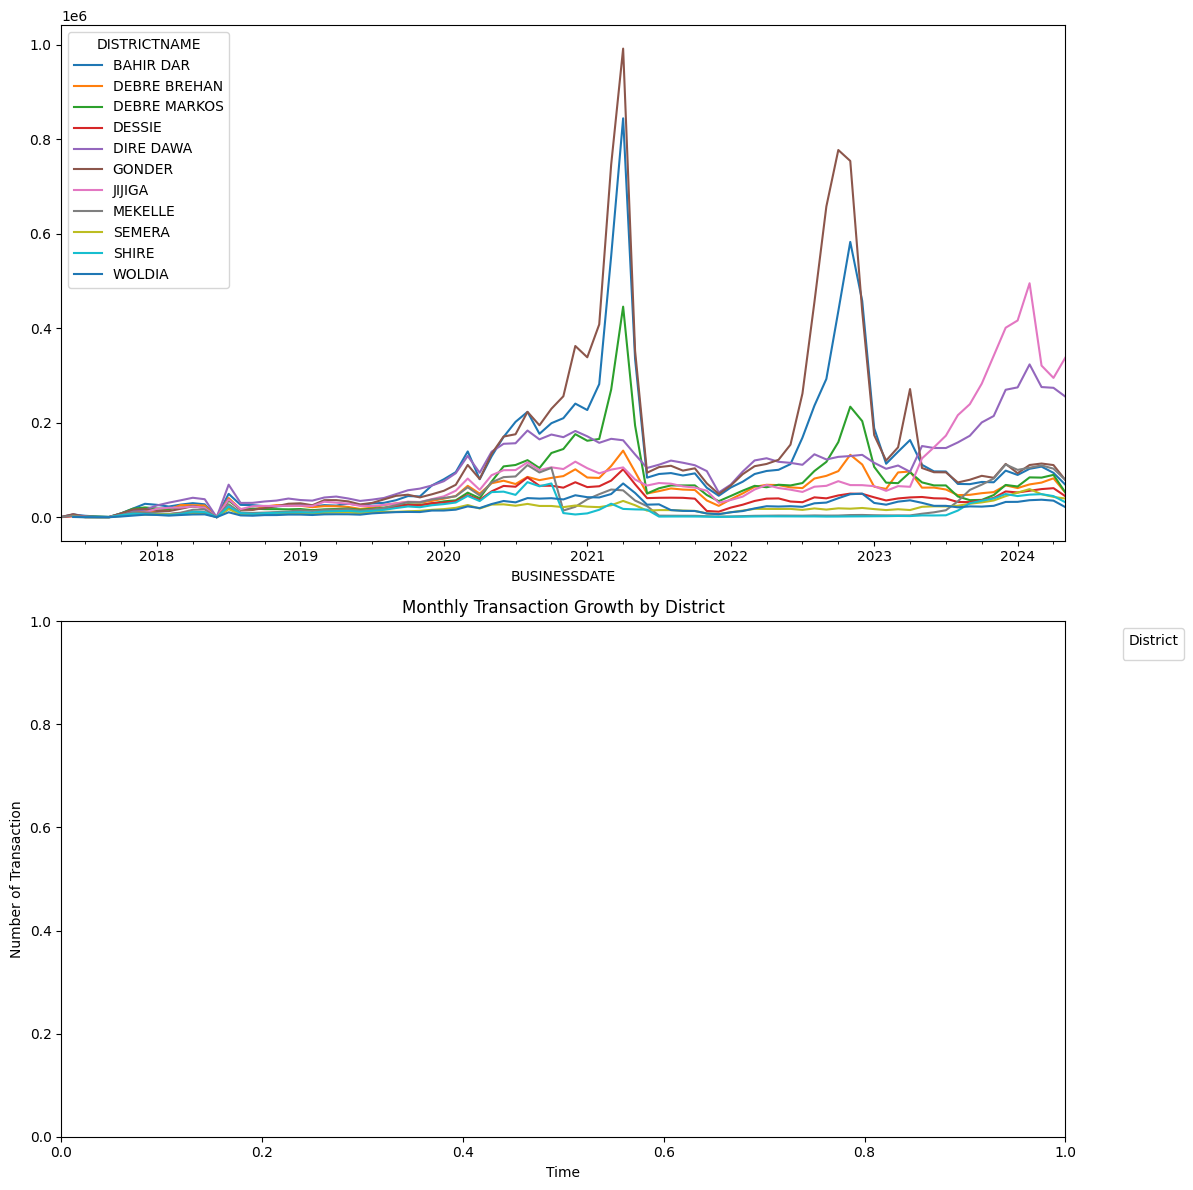

In [21]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
region_monthly_trx_1.plot(ax=ax1)
plt.title('Monthly Transaction Growth by District')
plt.xlabel('Time')
plt.ylabel('Number of Transaction')
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot
plt.tight_layout()
plt.show()

C:\Users\CBE\AppData\Local\Temp\ipykernel_15068\3416328579.py:6: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_customers = df['NO_CUSTOMER'].resample('Y').sum()
C:\Users\CBE\AppData\Local\Temp\ipykernel_15068\3416328579.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  halfyear_customers = df['NO_CUSTOMER'].resample('6M').sum()
C:\Users\CBE\AppData\Local\Temp\ipykernel_15068\3416328579.py:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_customers = df['NO_CUSTOMER'].resample('Q').sum()
C:\Users\CBE\AppData\Local\Temp\ipykernel_15068\3416328579.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_customers = df['NO_CUSTOMER'].resample('M').sum()


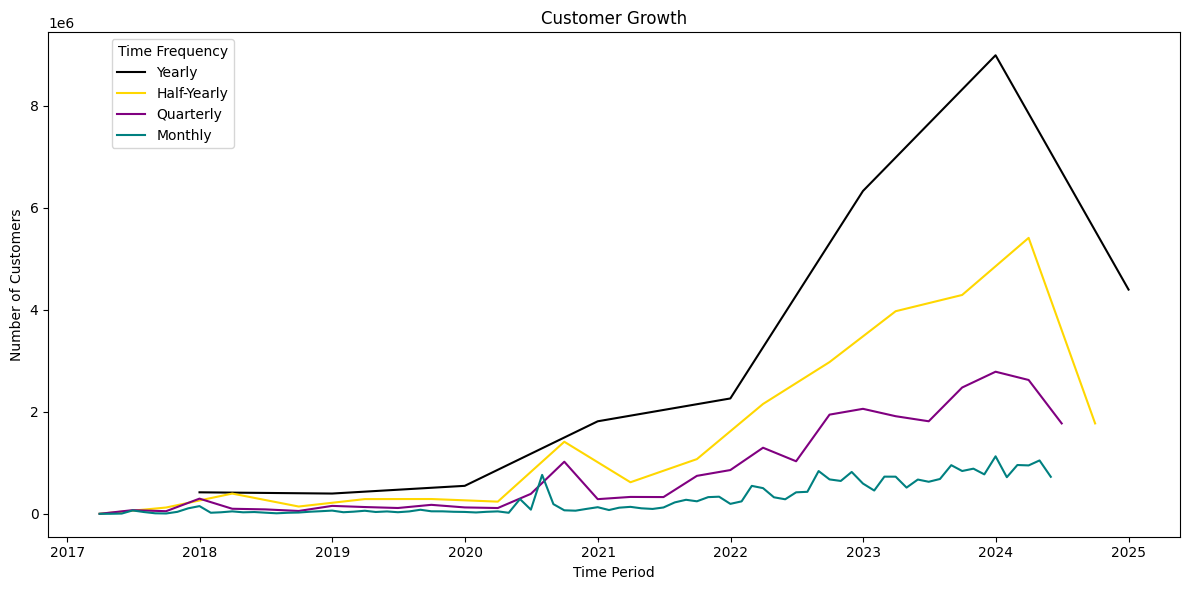

C:\Users\CBE\AppData\Local\Temp\ipykernel_15068\3416328579.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  region_monthly_customers = df.groupby('REGIONNAME')['NO_CUSTOMER'].resample('M').sum().unstack(0)
C:\Users\CBE\AppData\Local\Temp\ipykernel_15068\3416328579.py:25: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  region_quarterly_customers = df.groupby('REGIONNAME')['NO_CUSTOMER'].resample('Q').sum().unstack(0)
C:\Users\CBE\AppData\Local\Temp\ipykernel_15068\3416328579.py:26: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  region_yearly_customers = df.groupby('REGIONNAME')['NO_CUSTOMER'].resample('Y').sum().unstack(0)


<Figure size 1200x600 with 0 Axes>

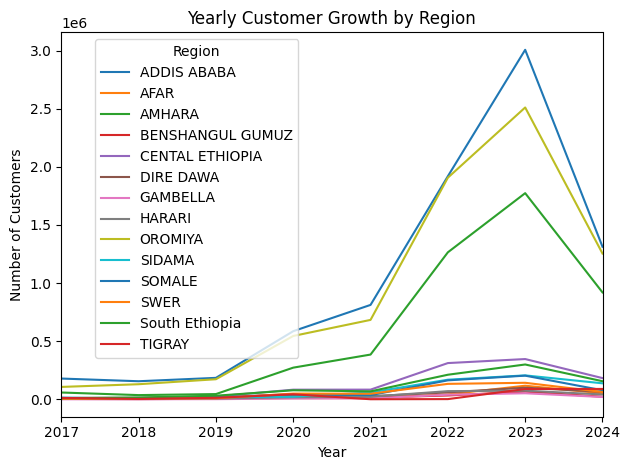

<Figure size 1200x600 with 0 Axes>

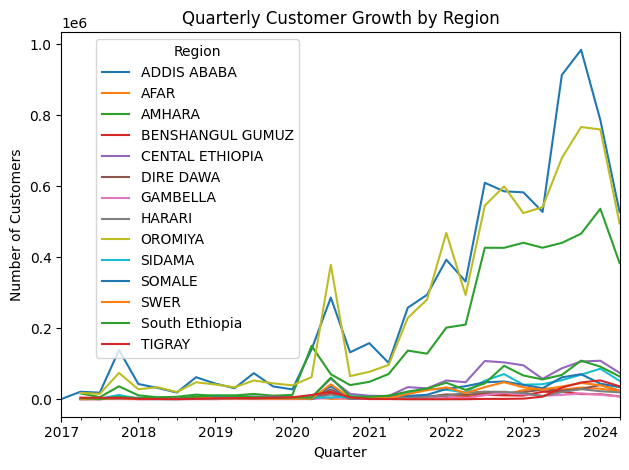

<Figure size 3000x600 with 0 Axes>

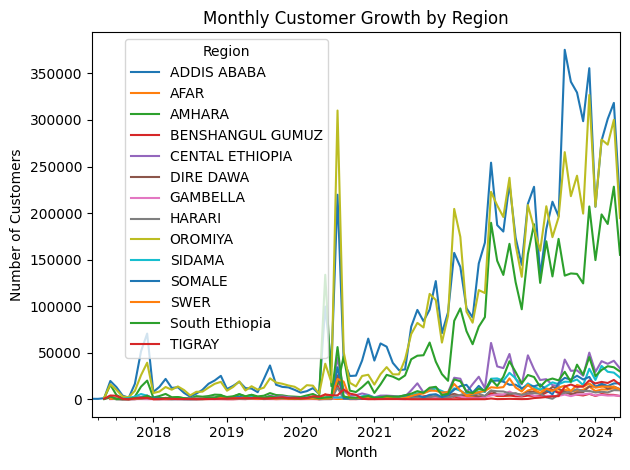

In [22]:
# df = data

# Yearly customer growth

plt.figure(figsize=(12, 6))
yearly_customers = df['NO_CUSTOMER'].resample('Y').sum()
halfyear_customers = df['NO_CUSTOMER'].resample('6M').sum()
quarterly_customers = df['NO_CUSTOMER'].resample('Q').sum()
monthly_customers = df['NO_CUSTOMER'].resample('M').sum()

sns.lineplot(data=yearly_customers, color = 'Black', label='Yearly')
sns.lineplot(data=halfyear_customers, color = 'Gold', label='Half-Yearly')
sns.lineplot(data=quarterly_customers, color = 'Purple', label='Quarterly')
sns.lineplot(data=monthly_customers, color = 'Teal', label='Monthly')
plt.title('Customer Growth')
plt.xlabel('Time Period')
plt.ylabel('Number of Customers')
plt.tight_layout()
# Display legend
plt.legend(title='Time Frequency', bbox_to_anchor=(0.05, 1), loc='upper left')
plt.show()

# Yearly customer growth by region
region_monthly_customers = df.groupby('REGIONNAME')['NO_CUSTOMER'].resample('M').sum().unstack(0)
region_quarterly_customers = df.groupby('REGIONNAME')['NO_CUSTOMER'].resample('Q').sum().unstack(0)
region_yearly_customers = df.groupby('REGIONNAME')['NO_CUSTOMER'].resample('Y').sum().unstack(0)
plt.figure(figsize=(12, 6))
region_yearly_customers.plot()
plt.title('Yearly Customer Growth by Region')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.legend(title='Region', bbox_to_anchor=(0.05, 1), loc='upper left')  # Legend outside the plot
plt.tight_layout()
plt.show()

# Quarterly customer growth by region

plt.figure(figsize=(12, 6))
region_quarterly_customers.plot()
plt.title('Quarterly Customer Growth by Region')
plt.xlabel('Quarter')
plt.ylabel('Number of Customers')
plt.legend(title='Region', bbox_to_anchor=(0.05, 1), loc='upper left')  # Legend outside the plot
plt.tight_layout()
plt.show()

plt.figure(figsize=(30, 6))
region_monthly_customers.plot()
plt.title('Monthly Customer Growth by Region')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.legend(title='Region', bbox_to_anchor=(0.05, 1), loc='upper left')  # Legend outside the plot
plt.tight_layout()
plt.show()


C:\Users\CBE\AppData\Local\Temp\ipykernel_15068\1163734628.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  region_yearly_customers = df.groupby('CBE_REGION')['NO_CUSTOMER'].resample('Y').sum().unstack(0)


<Figure size 1200x600 with 0 Axes>

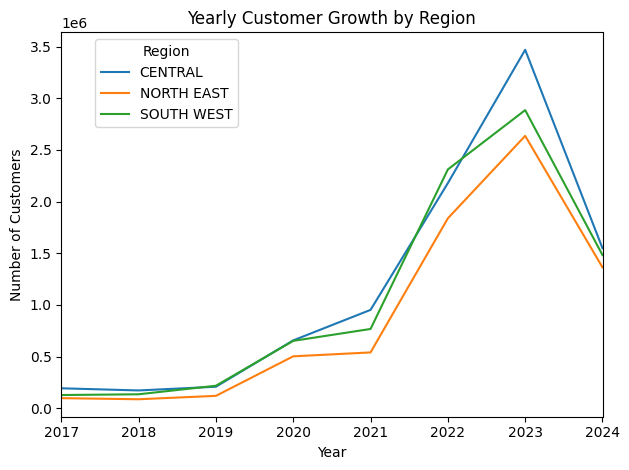

C:\Users\CBE\AppData\Local\Temp\ipykernel_15068\1163734628.py:13: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  region_quarterly_customers = df.groupby('CBE_REGION')['NO_CUSTOMER'].resample('Q').sum().unstack(0)


<Figure size 1200x600 with 0 Axes>

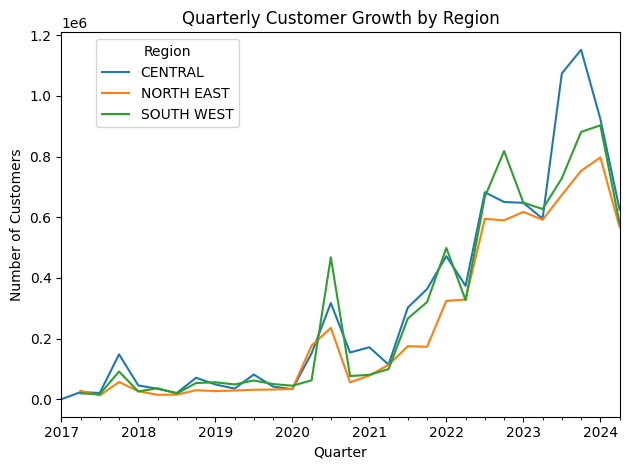

In [23]:
# Yearly customer growth by region
region_yearly_customers = df.groupby('CBE_REGION')['NO_CUSTOMER'].resample('Y').sum().unstack(0)
plt.figure(figsize=(12, 6))
region_yearly_customers.plot()
plt.title('Yearly Customer Growth by Region')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.legend(title='Region', bbox_to_anchor=(0.05, 1), loc='upper left')  # Legend outside the plot
plt.tight_layout()
plt.show()

# Quarterly customer growth by region
region_quarterly_customers = df.groupby('CBE_REGION')['NO_CUSTOMER'].resample('Q').sum().unstack(0)
plt.figure(figsize=(12, 6))
region_quarterly_customers.plot()
plt.title('Quarterly Customer Growth by Region')
plt.xlabel('Quarter')
plt.ylabel('Number of Customers')
plt.legend(title='Region', bbox_to_anchor=(0.05, 1), loc='upper left')  # Legend outside the plot
plt.tight_layout()
plt.show()


C:\Users\CBE\AppData\Local\Temp\ipykernel_15068\4080201420.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  region_yearly_customers = df.groupby('DISTRICTNAME')['NO_CUSTOMER'].resample('Y').sum().unstack(0)


<Figure size 1200x600 with 0 Axes>

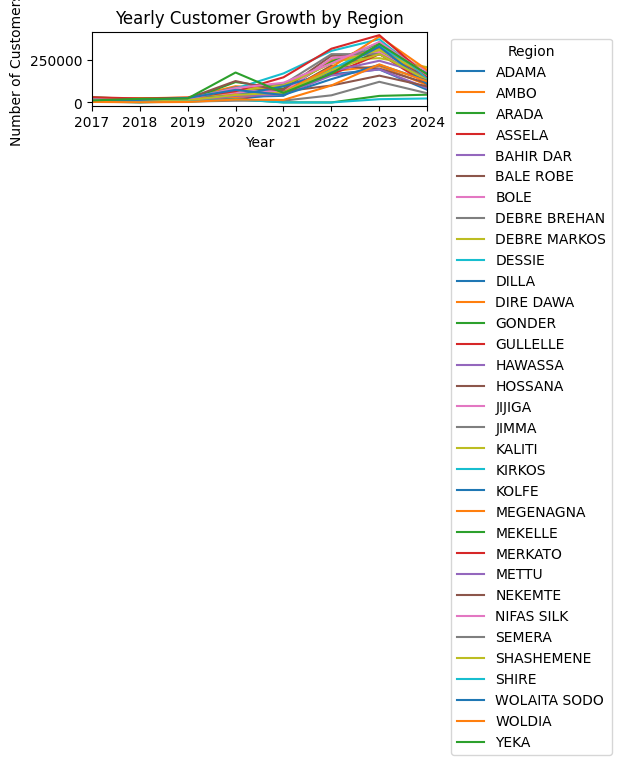

C:\Users\CBE\AppData\Local\Temp\ipykernel_15068\4080201420.py:13: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  region_quarterly_customers = df.groupby('DISTRICTNAME')['NO_CUSTOMER'].resample('Q').sum().unstack(0)


<Figure size 1200x600 with 0 Axes>

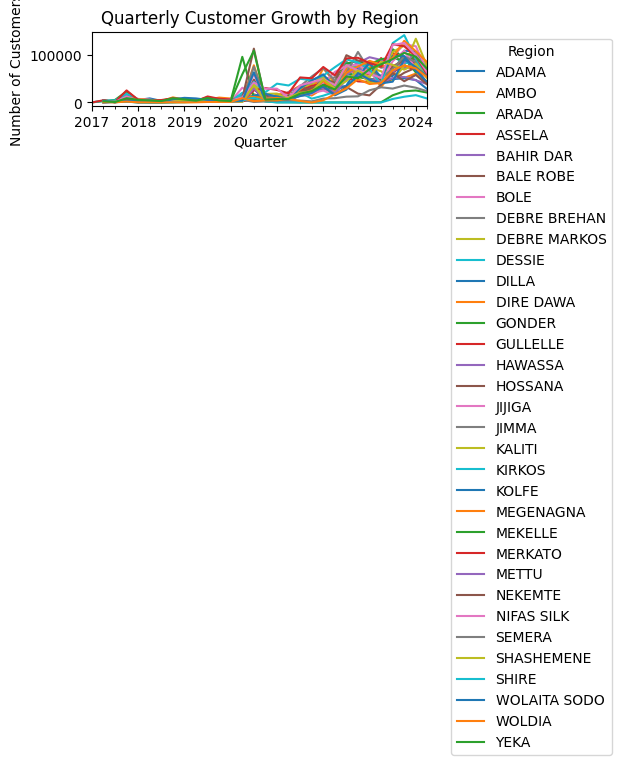

In [24]:
# Yearly customer growth by region
region_yearly_customers = df.groupby('DISTRICTNAME')['NO_CUSTOMER'].resample('Y').sum().unstack(0)
plt.figure(figsize=(12, 6))
region_yearly_customers.plot()
plt.title('Yearly Customer Growth by Region')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot
plt.tight_layout()
plt.show()

# Quarterly customer growth by region
region_quarterly_customers = df.groupby('DISTRICTNAME')['NO_CUSTOMER'].resample('Q').sum().unstack(0)
plt.figure(figsize=(12, 6))
region_quarterly_customers.plot()
plt.title('Quarterly Customer Growth by Region')
plt.xlabel('Quarter')
plt.ylabel('Number of Customers')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot
plt.tight_layout()
plt.show()

C:\Users\CBE\AppData\Local\Temp\ipykernel_15068\2520023819.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  region_monthly_customers = df.groupby('REGIONNAME')['NO_CUSTOMER'].resample('M').sum().unstack(0)


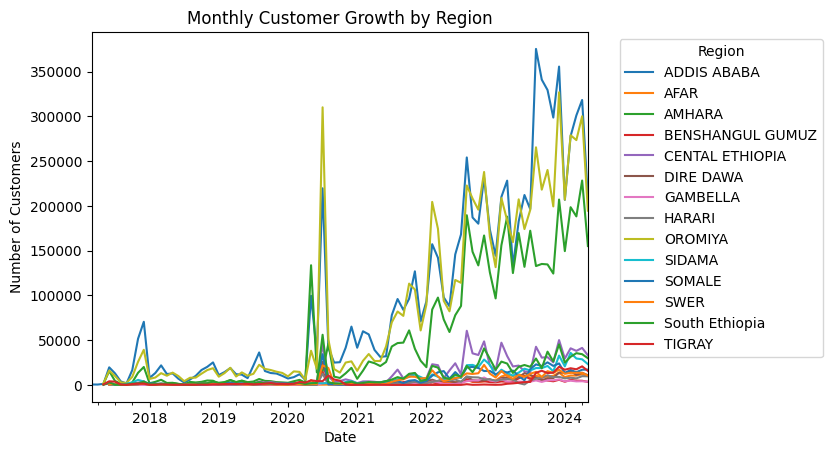

In [25]:
# Group by REGIONNAME and resample by month
region_monthly_customers = df.groupby('REGIONNAME')['NO_CUSTOMER'].resample('M').sum().unstack(0)

# Plotting
# plt.figure(figsize=(30, 20))
region_monthly_customers.plot()
plt.title('Monthly Customer Growth by Region')
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show();


C:\Users\CBE\AppData\Local\Temp\ipykernel_15068\2798798885.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=unique_branches_per_district_sort, x='DISTRICTNAME', y='UNIQUE_BRANCH_COUNT', palette='viridis')


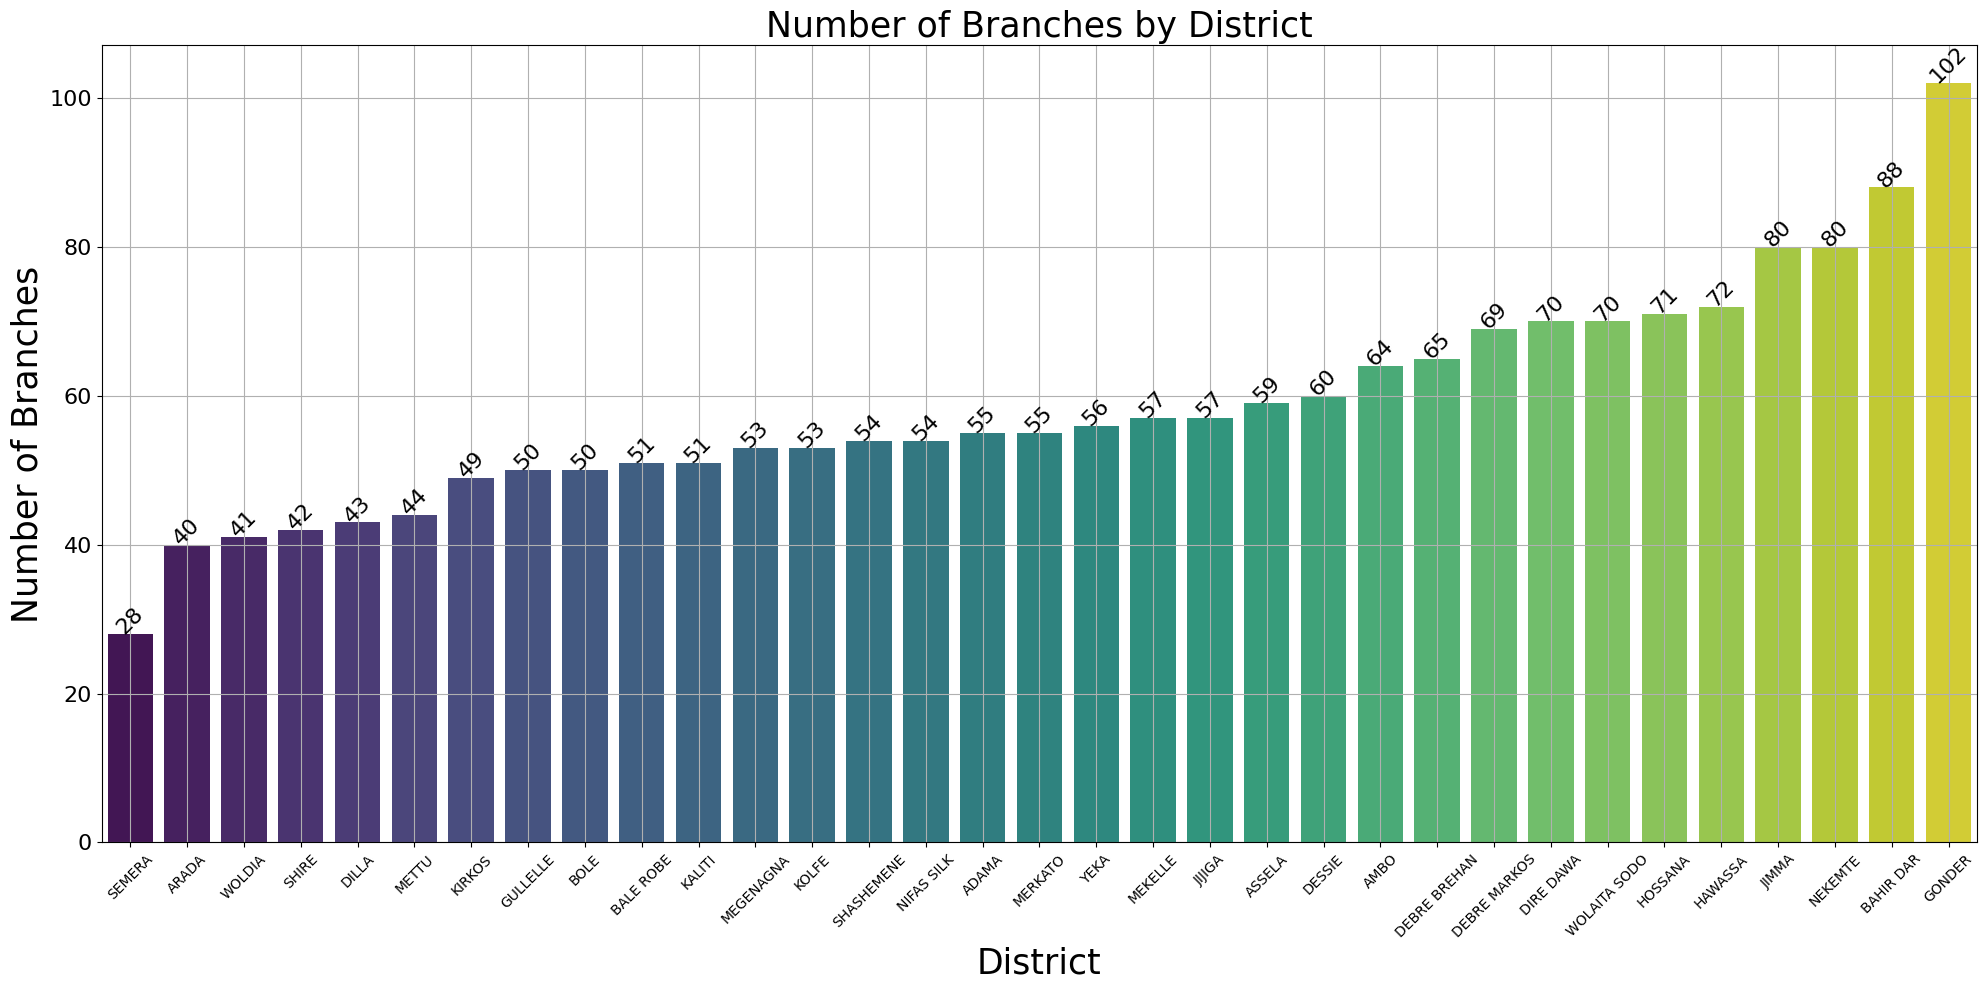

In [26]:
# Count unique branch names in each district
unique_branches_per_district = df.groupby('DISTRICTNAME')['BRANCHNAME'].nunique().reset_index()
unique_branches_per_district.columns = ['DISTRICTNAME', 'UNIQUE_BRANCH_COUNT']
unique_branches_per_district_sort = unique_branches_per_district.sort_values(by = 'UNIQUE_BRANCH_COUNT').reset_index()


# Plot the results
plt.figure(figsize=(20, 10))
barplot = sns.barplot(data=unique_branches_per_district_sort, x='DISTRICTNAME', y='UNIQUE_BRANCH_COUNT', palette='viridis')

# Add labels on top of each bar and rotate them
for index, row in unique_branches_per_district_sort.iterrows():
    barplot.text(index, row['UNIQUE_BRANCH_COUNT'], row['UNIQUE_BRANCH_COUNT'], color='black', ha="center", rotation=45, fontsize = 16)

# Customize plot
plt.title('Number of Branches by District', fontsize = 25)
plt.xlabel('District', fontsize = 25)
plt.ylabel('Number of Branches', fontsize = 25)
plt.xticks(rotation=45)  # Rotate district labels for better readability
plt.yticks(fontsize = 16)
plt.tight_layout()
plt.grid()
plt.show()

In [30]:
central = df[df.CBE_REGION == 'CENTRAL'].groupby('DISTRICTNAME')['NO_CUSTOMER'].sum().reset_index()
south_west = df[df.CBE_REGION == 'SOUTH WEST'].groupby('DISTRICTNAME')['NO_CUSTOMER'].sum().reset_index()
north_est = df[df.CBE_REGION == 'NORTH EAST'].groupby('DISTRICTNAME')['NO_CUSTOMER'].sum().reset_index().sort_values(by = 'NO_CUSTOMER').reset_index()


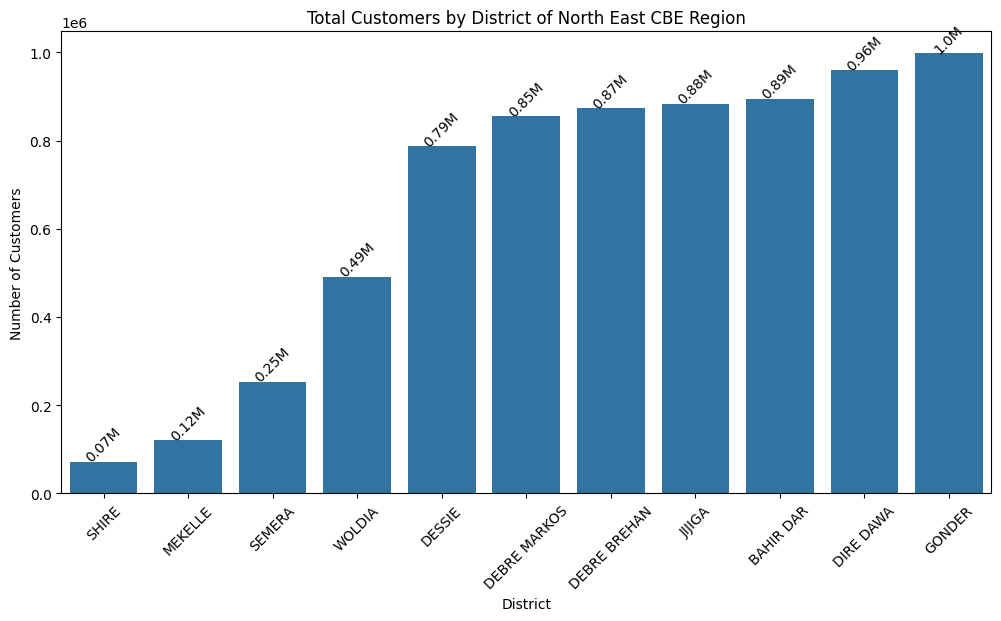

In [31]:
# Bar plot for customer distribution by REGIONNAME
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='DISTRICTNAME', y='NO_CUSTOMER', data=north_est, estimator=sum)

# Add labels on top of each bar
for index, row in north_est.iterrows():
    barplot.text(index, row['NO_CUSTOMER'], f"{round(row['NO_CUSTOMER']/1000000, 2)}M", color='black', ha="center", rotation=45)


plt.title('Total Customers by District of North East CBE Region')
plt.xlabel('District')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

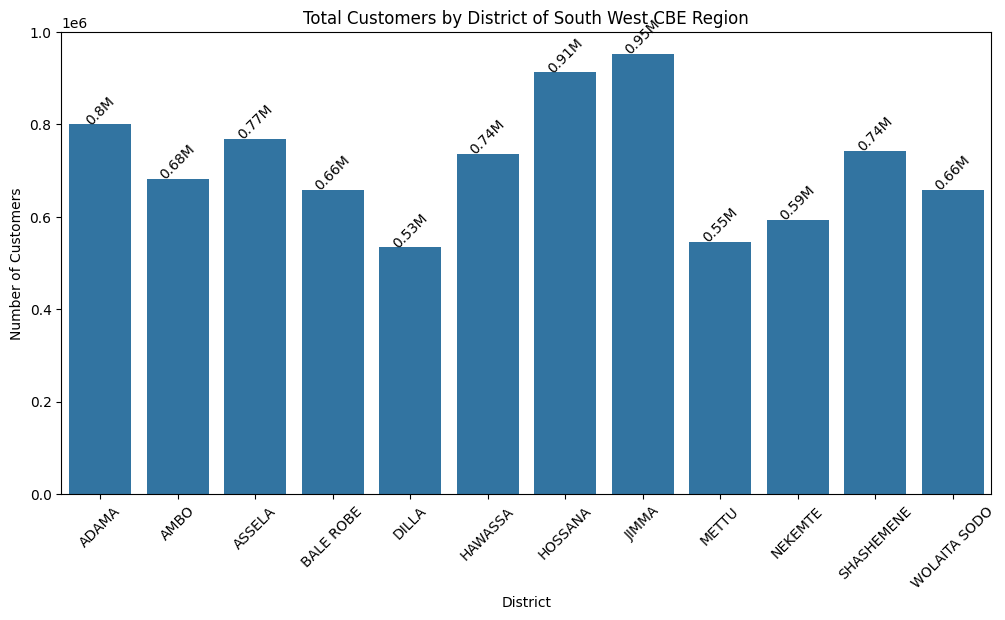

In [32]:
# Bar plot for customer distribution by REGIONNAME
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='DISTRICTNAME', y='NO_CUSTOMER', data=south_west, estimator=sum)

# Add labels on top of each bar
for index, row in south_west.iterrows():
    barplot.text(index, row['NO_CUSTOMER'], f"{round(row['NO_CUSTOMER']/1000000, 2)}M", color='black', ha="center", rotation=45)


plt.title('Total Customers by District of South West CBE Region')
plt.xlabel('District')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

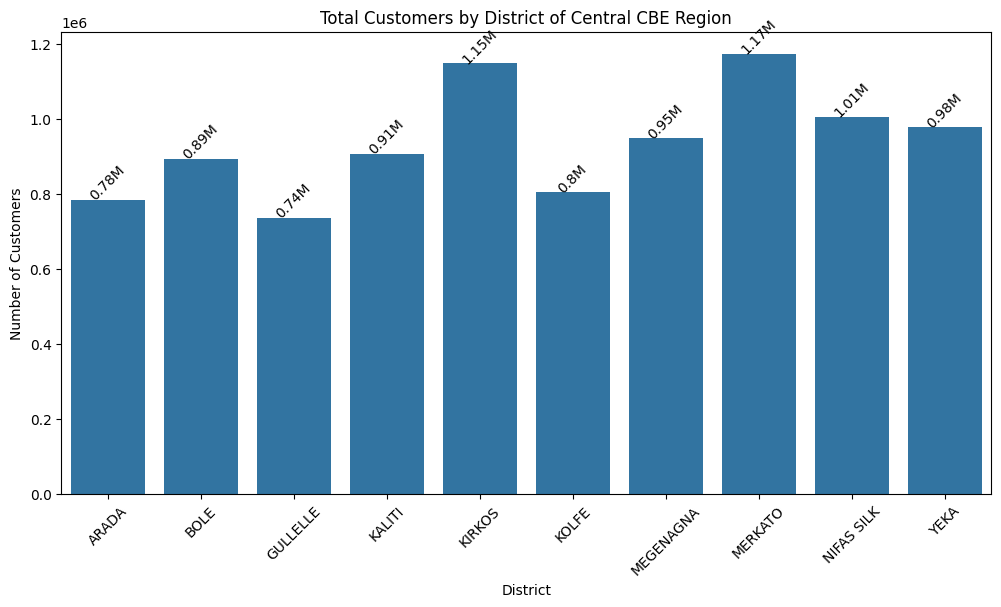

In [33]:
# Bar plot for customer distribution by REGIONNAME
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='DISTRICTNAME', y='NO_CUSTOMER', data=central, estimator=sum)

# Add labels on top of each bar
for index, row in central.iterrows():
    barplot.text(index, row['NO_CUSTOMER'], f"{round(row['NO_CUSTOMER']/1000000, 2)}M", color='black', ha="center", rotation=45)


plt.title('Total Customers by District of Central CBE Region')
plt.xlabel('District')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

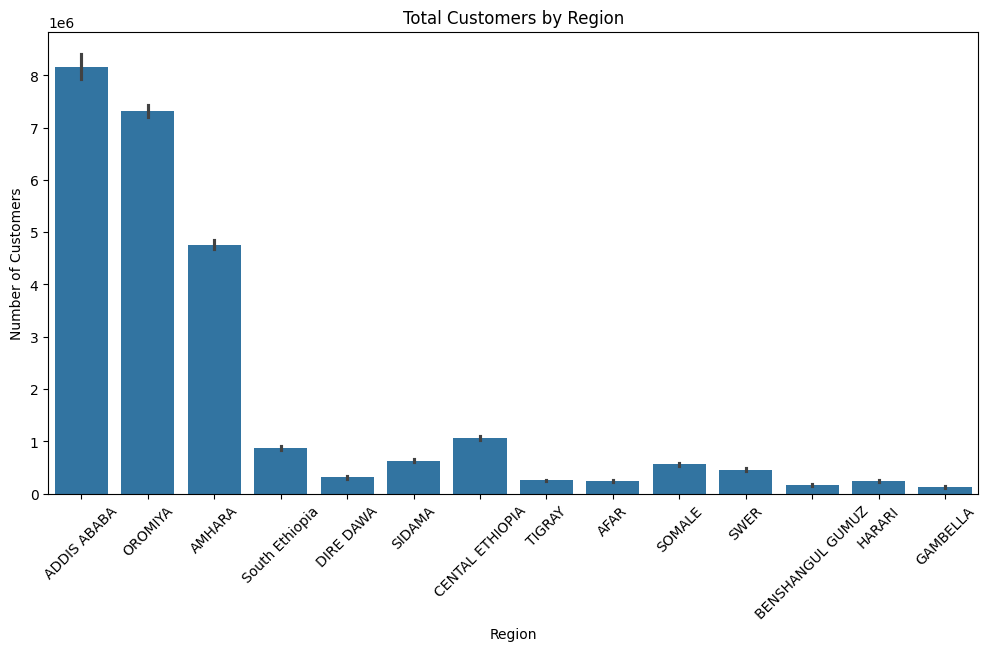

In [28]:
# Bar plot for customer distribution by REGIONNAME
plt.figure(figsize=(12, 6))
sns.barplot(x='REGIONNAME', y='NO_CUSTOMER', data=df, estimator=sum)
plt.title('Total Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

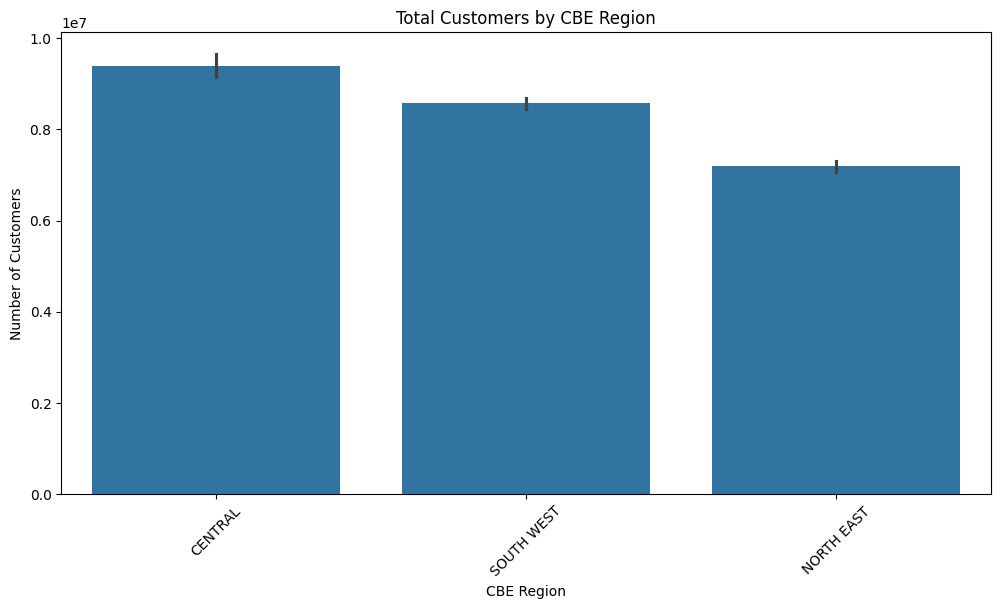

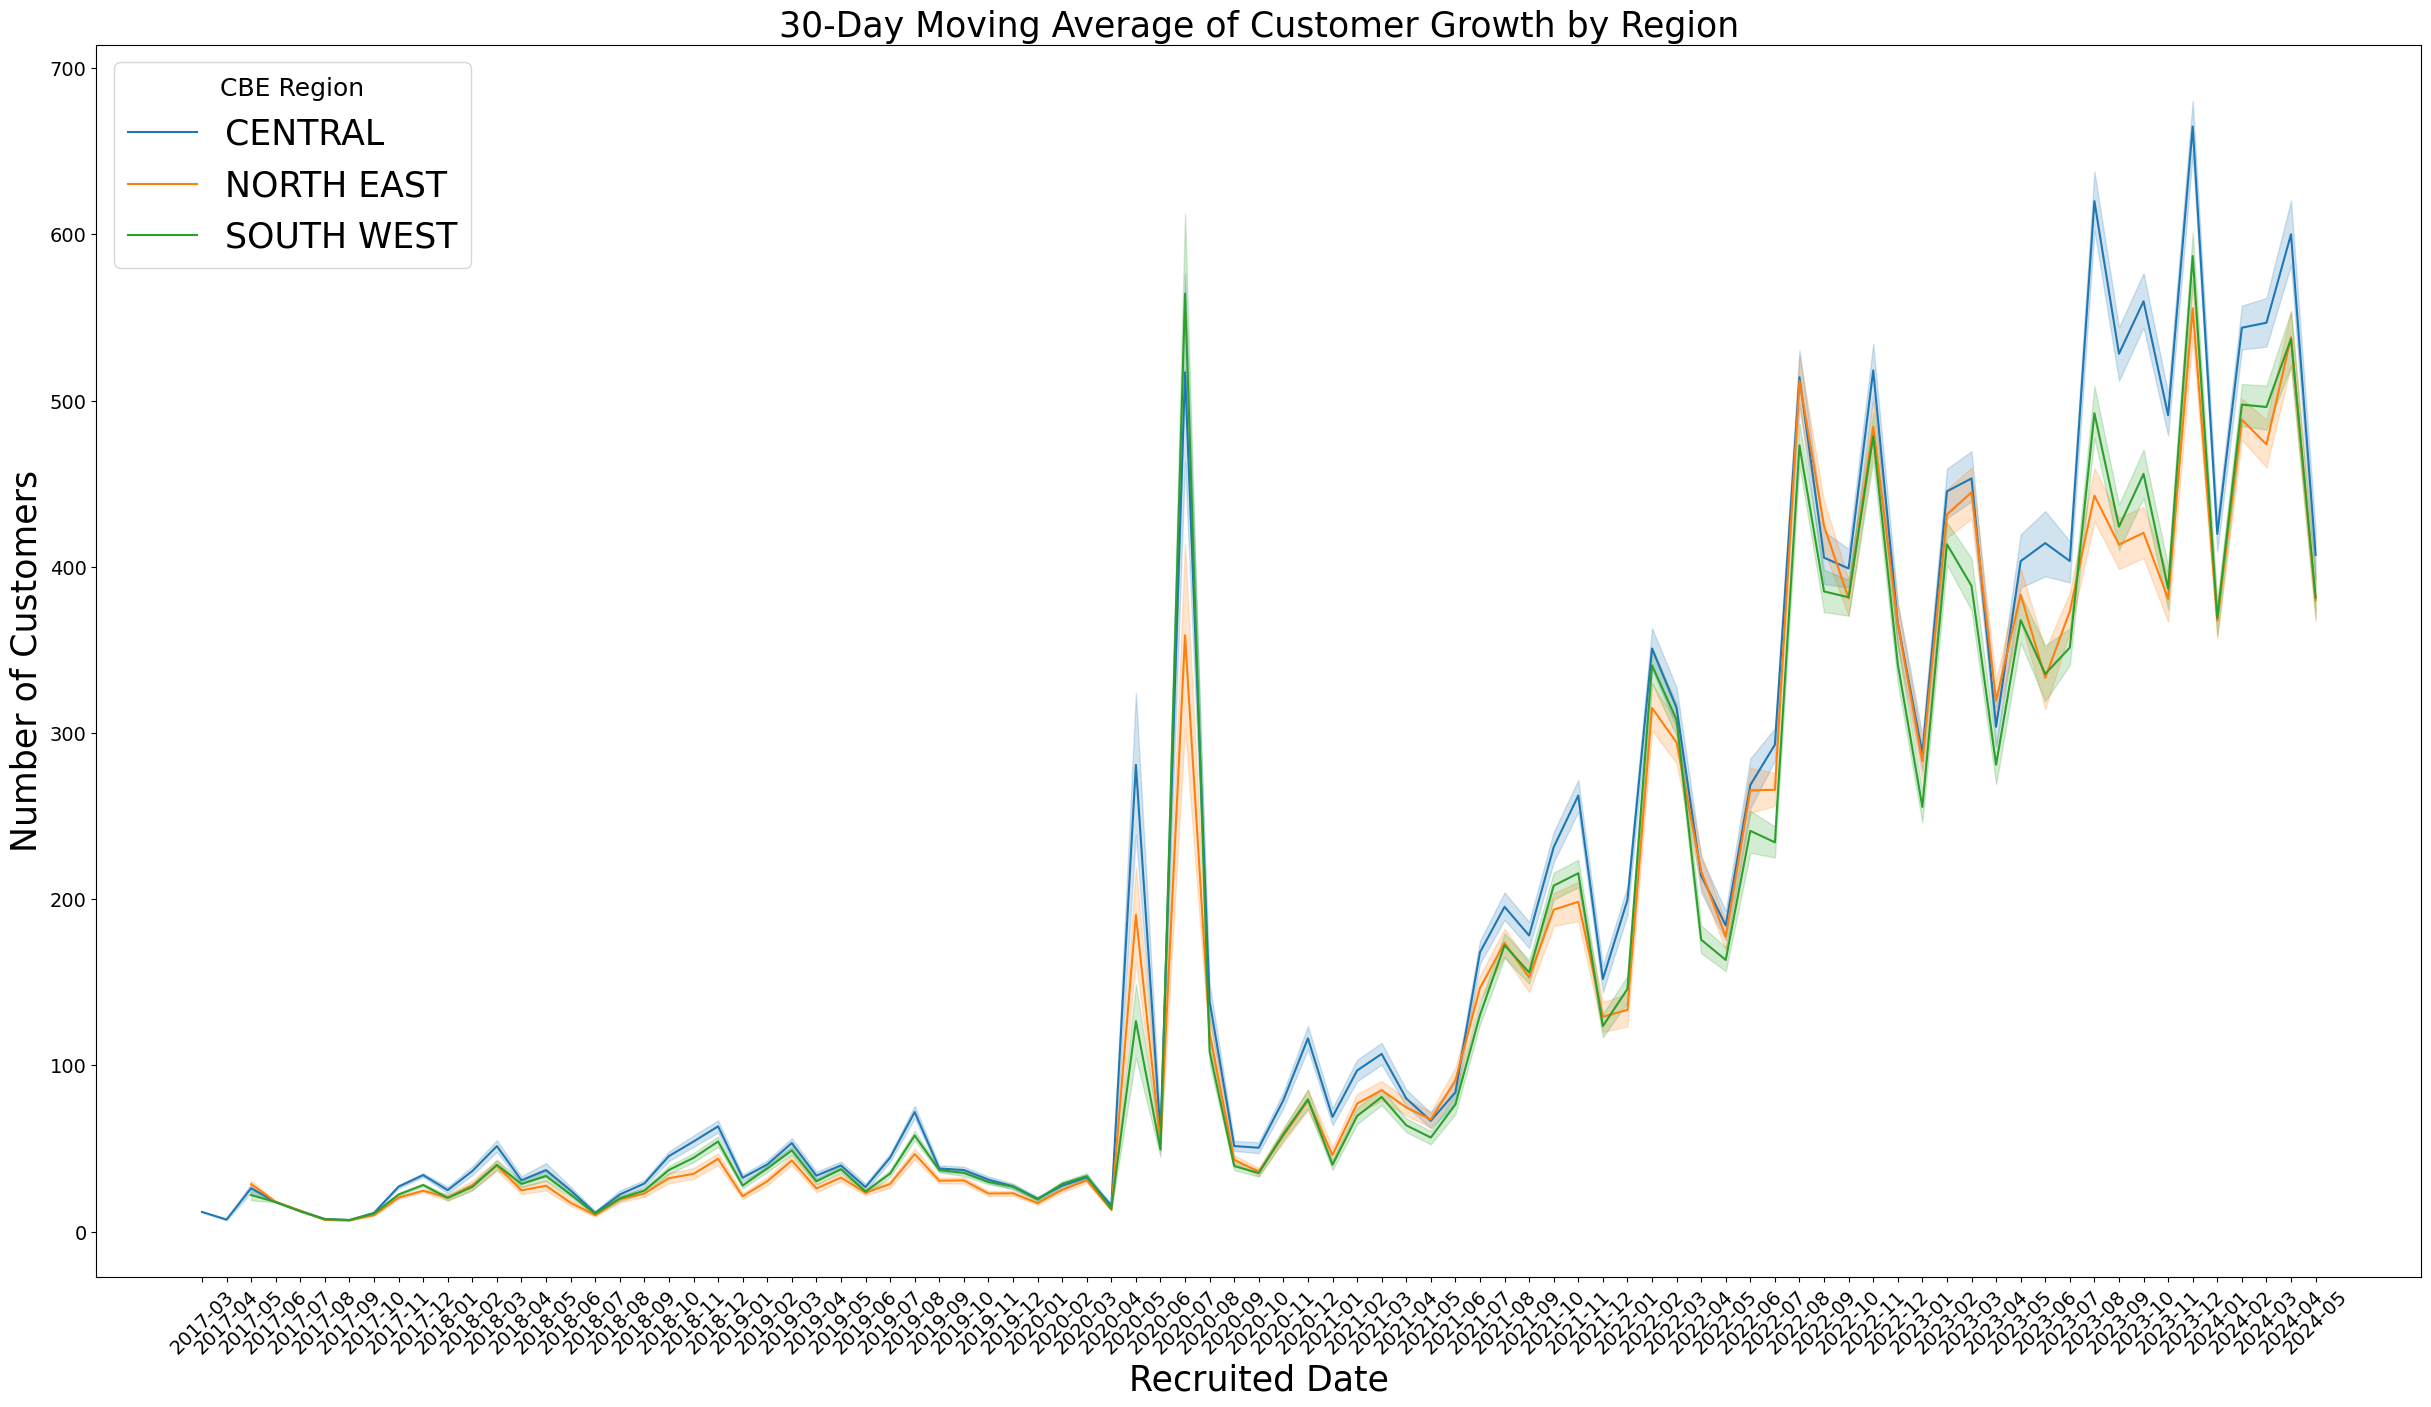

In [29]:
# Set index
# df.set_index('OPEN_DATE', inplace=True)

# Customer distribution by region
plt.figure(figsize=(12, 6))
sns.barplot(x='CBE_REGION', y='NO_CUSTOMER', data=df, estimator=sum)
plt.title('Total Customers by CBE Region')
plt.xlabel('CBE Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

# # Heatmap of customer growth by region
# pivot_table = df.pivot_table(index='OPEN_DATE', columns='REGIONNAME', values='NO_CUSTOMER', aggfunc='sum')
# plt.figure(figsize=(12, 6))
# sns.heatmap(pivot_table.T, cmap='viridis', cbar_kws={'label': 'Number of Customers'})
# plt.title('Heatmap of Customer Growth by Region Over Time')
# plt.xlabel('Date')
# plt.ylabel('Region')
# plt.show()
df = pd.read_csv('./cps_merged_cust.csv')
# 30-Day moving average
df['monthly_avg'] = df['NO_CUSTOMER'].rolling(window=30).mean()
df = df.sort_values(by = 'OPEN_DATE')
plt.figure(figsize=(30, 16))
sns.lineplot(data=df, x='OPEN_DATE', y='monthly_avg', hue='CBE_REGION')
plt.title('30-Day Moving Average of Customer Growth by Region', fontsize = 25)
plt.xlabel('Recruited Date', fontsize = 25)
plt.ylabel('Number of Customers', fontsize = 25)
plt.legend(title='CBE Region', fontsize = 25, title_fontsize=18)
plt.xticks(rotation = 45, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()